In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
avocado = pd.read_csv('avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Text(0.5, 1.0, 'data tahunan jumlah  alpkuat')

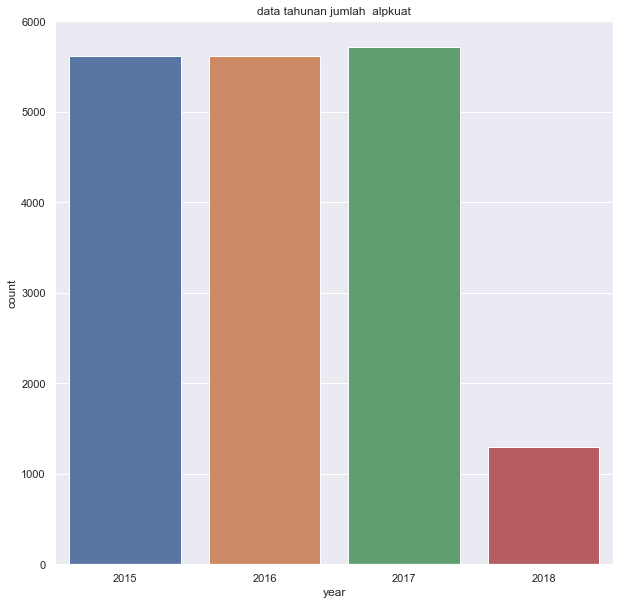

In [3]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.countplot(data=avocado,x='year')
plt.title("data tahunan jumlah  alpkuat")

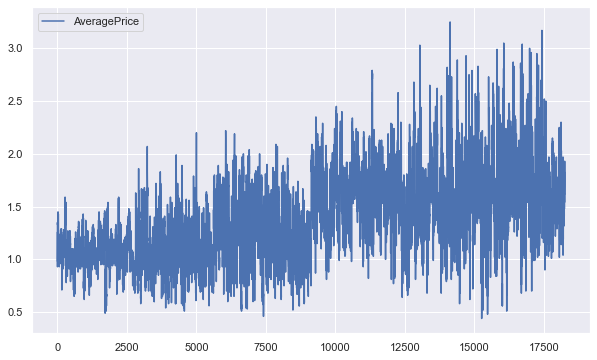

In [4]:
average = avocado[['AveragePrice']]
average.plot(kind='line', figsize=(10,6))
plt.show()

<AxesSubplot:ylabel='AveragePrice'>

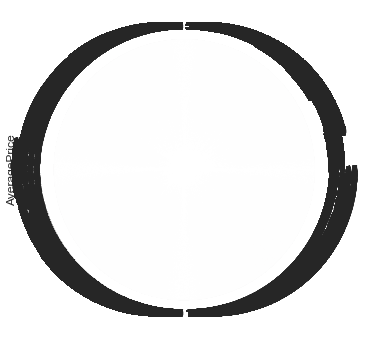

In [5]:
types = avocado['AveragePrice']
types.plot.pie(y="count", figsize=(6,6))


In [6]:
#menggunakan IQR dalam memisahkan outlier
q1 = avocado["4770"].describe().loc["25%"]
q3 = avocado["4770"].describe().loc["75%"]
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

data4770_tnpoutliers = [(avocado["4770"] >= lower_bound) & (avocado["4770"] <= upper_bound)]
data4770_tnpoutliers
#hasil yang didapatkan adalah True, dikarenakan sudah menggunakan IQR yang membuang ouliers

[0        True
 1        True
 2        True
 3        True
 4        True
          ... 
 18244    True
 18245    True
 18246    True
 18247    True
 18248    True
 Name: 4770, Length: 18249, dtype: bool]

Text(0.5, 1.0, 'Boxplot Age')

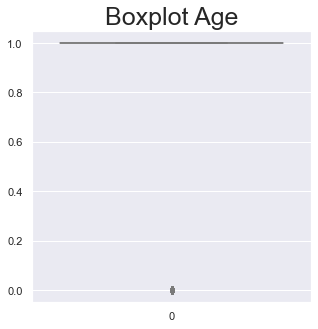

In [7]:
#Boxplot
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=data4770_tnpoutliers, palette='pastel')
plt.title('Boxplot Age', fontsize=25)



In [8]:
#from sklearn.preprocessing import LabelEncoder

#label = LabelEncoder()
#for i in avocado['4770']:
#    data4770_tnpoutliers[i] = label.fit_transform(data4770_tnpoutliers[i])

#data4770_tnpoutliers()

avocado['4770'] = avocado ['4770'].astype('category')
avocado['4770'] = avocado ['4770'].cat.codes
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,1400,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,1570,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,2516,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,1789,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,1836,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
normalize = avocado
normalize['4770'] = (normalize['4770'] - normalize['4770'].min()) / (normalize['4770'].max() - normalize['4770'].min())
normalize['4770']

0        0.115990
1        0.130075
2        0.208451
3        0.148219
4        0.152113
           ...   
18244    0.000000
18245    0.000000
18246    0.390389
18247    0.390224
18248    0.269428
Name: 4770, Length: 18249, dtype: float64